In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Data Science Project/data"
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_bids = pd.read_csv("bids.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Data Science Project/data


In [ ]:
data_bids = data_bids.replace({' ': ''}, regex = True)
data_bids_sorted = data_bids.sort_values(by=['bidder_id', 'time'], ascending = [True, True]) ##sorting the data by the bidder_id and time 
bids = pd.DataFrame(data = data_bids_sorted["bidder_id"].unique(), columns = ["bidder_id"], index = data_bids_sorted["bidder_id"].unique()) 

In [ ]:
counts = data_bids_sorted["bidder_id"].value_counts()
bids["bids_count_num"] = counts
timediff = data_bids_sorted.groupby("bidder_id")["time"].diff()
timediff_str = timediff.astype(str).fillna('')
data_bids_sorted["timediff_num"] = timediff
data_bids_sorted["timediff"] = timediff_str

In [ ]:
text_cols = ["auction", "merchandise", "device", "timediff", "country", "ip", "url"]
for col in text_cols:
    count_str = col + "_nunique_num"
    bids[count_str]  = data_bids_sorted.groupby("bidder_id")[col].nunique()

In [ ]:
max_time = data_bids_sorted.groupby("bidder_id")["time"].max()
bids["maxtime"] = max_time
min_time = data_bids_sorted.groupby("bidder_id")["time"].min()
bids["mintime"] = min_time
max_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
max_diff = max_diff.fillna(max_diff.mean())
bids['maxdiff_num'] = max_diff
min_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].min()
min_diff = min_diff.fillna(min_diff.mean())
bids['mindiff_num'] = min_diff

In [ ]:
overall_train = data_train.merge(bids)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(overall_train.drop(["outcome","bidder_id","payment_account","address"] ,axis = 1), overall_train["outcome"], test_size=0.33)

In [ ]:
print(auc)

In [ ]:
feature_importance = clf.feature_importances_

In [ ]:
importances = clf.feature_importances_
names = X_train.columns
label_dict = dict(zip(names,importances))
srt_dict = sorted(label_dict.items(),key = lambda x: x[1],reverse = True)
print(srt_dict)


[('merchandise_nunique_num', 0.0), ('country_nunique_num', 0.039459329153479765), ('maxdiff_num', 0.05180562518027826), ('auction_nunique_num', 0.06379751988060692), ('url_nunique_num', 0.06684615813427702), ('maxtime', 0.08301431932804114), ('mintime', 0.08838598122249879), ('device_nunique_num', 0.08922855836561756), ('ip_nunique_num', 0.09209174553813257), ('mindiff_num', 0.1025164260486908), ('timediff_nunique_num', 0.11350630361770406), ('bids_count_num', 0.2093480335306731)]


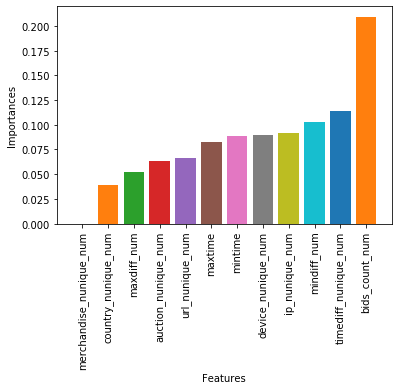

In [ ]:
importances = clf.feature_importances_
names = X_train.columns
label_dict = dict(zip(names,importances))
srt_dict = sorted(label_dict.items(),key = lambda x: x[1])
print(srt_dict)
for i in range(len(importances)):
    plt.bar(srt_dict[i][0],srt_dict[i][1])
plt.xlabel("Features")
plt.ylabel("Importances")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
devices = data_bids["device"].unique().tolist()

In [ ]:
print(devices)

['phone0', 'phone1', 'phone2', 'phone4', 'phone5', 'phone7', 'phone8', 'phone9', 'phone10', 'phone11', 'phone12', 'phone13', 'phone15', 'phone3', 'phone16', 'phone17', 'phone18', 'phone19', 'phone20', 'phone21', 'phone23', 'phone24', 'phone25', 'phone26', 'phone27', 'phone28', 'phone29', 'phone31', 'phone32', 'phone33', 'phone34', 'phone35', 'phone36', 'phone37', 'phone38', 'phone39', 'phone42', 'phone44', 'phone45', 'phone46', 'phone47', 'phone48', 'phone49', 'phone50', 'phone51', 'phone52', 'phone53', 'phone54', 'phone55', 'phone57', 'phone58', 'phone59', 'phone22', 'phone60', 'phone62', 'phone63', 'phone64', 'phone65', 'phone67', 'phone6', 'phone69', 'phone70', 'phone71', 'phone72', 'phone73', 'phone74', 'phone75', 'phone76', 'phone77', 'phone78', 'phone79', 'phone80', 'phone81', 'phone82', 'phone83', 'phone84', 'phone85', 'phone86', 'phone87', 'phone88', 'phone89', 'phone90', 'phone91', 'phone92', 'phone93', 'phone94', 'phone95', 'phone96', 'phone97', 'phone98', 'phone99', 'phone41

In [ ]:
ip_heads = set()
for i in data_bids["ip"]:
  j = i.split(".")
  ip_heads.add(j[0])


In [ ]:
bids2 = pd.DataFrame(data = data_bids_sorted["bidder_id"].unique(), columns = ["bidder_id"], index = data_bids_sorted["bidder_id"].unique()) 
counts = data_bids_sorted["bidder_id"].value_counts()
bids2["bids_count_num"] = counts
timediff = data_bids_sorted.groupby("bidder_id")["time"].diff()
timediff_str = timediff.astype(str).fillna('')
data_bids_sorted["timediff_num"] = timediff
data_bids_sorted["timediff"] = timediff_str

In [ ]:
text_cols = ["auction", "merchandise", "device", "timediff", "country", "ip", "url"]
for col in text_cols:
    text_str = col + "s"
    count_str = col + "_nunique_num"
    bids2[text_str] = data_bids_sorted.groupby("bidder_id")[col].unique()
    bids2[count_str]  = data_bids_sorted.groupby("bidder_id")[col].nunique()
max_time = data_bids_sorted.groupby("bidder_id")["time"].max()
bids2["maxtime"] = max_time
min_time = data_bids_sorted.groupby("bidder_id")["time"].min()
bids2["mintime"] = min_time
max_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
max_diff = max_diff.fillna(max_diff.mean())
bids2['maxdiff_num'] = max_diff
min_diff = data_bids_sorted.groupby("bidder_id")["timediff_num"].max()
min_diff = min_diff.fillna(min_diff.mean())
bids2['mindiff_num'] = min_diff


In [ ]:
for i in ip_heads:
  bids2["ip = {}".format(i)] = 0 

for i in bids2["bidder_id"]:
  l = bids2.loc[bids2["bidder_id"] == i ]["ips"]
  k = []
  for j in range(len(l.tolist()[0])):
    p = l.tolist()[0][j].split(".")
    k.append(p[0])
  for h in k:
    if h in ip_heads:
      bids2.at[i,"ip = {}".format(h)] = 1

In [ ]:
for i in devices:
  bids2[i] = 0 


In [ ]:
for i in bids2["bidder_id"]:
  l = bids2.loc[bids2["bidder_id"] == i ]["devices"]
  k = l[0].tolist()
  for j in k:
    if j in devices:
       bids2.at[i,j] = 1

In [ ]:
countries = data_bids["country"].unique().tolist()

In [ ]:
for i in countries:
  bids2[i] = 0 

In [ ]:
for i in bids2["bidder_id"]:
  l = bids2.loc[bids2["bidder_id"] == i ]["countrys"]
  k = l[0].tolist()
  for j in k:
    if j in countries:
       bids2.at[i,j] = 1

In [ ]:
overall_train = data_train.merge(bids2)
X_train, X_test, y_train, y_test = train_test_split(overall_train.drop(["outcome","bidder_id","payment_account","address"] ,axis = 1), overall_train["outcome"], test_size=0.33)


In [ ]:
bids2.shape

(6614, 7571)

In [ ]:
X_train = X_train.drop(["auctions","devices","timediffs","countrys","ips","urls","merchandises"],axis = 1)
X_test = X_test.drop(["auctions","devices","timediffs","countrys","ips","urls","merchandises"],axis = 1)
bids2 = bids2.drop(["auctions","devices","timediffs","countrys","ips","urls","merchandises"],axis = 1)

In [ ]:
bids2

,bidder_id,bids_count_num,auction_nunique_num,merchandise_nunique_num,device_nunique_num,timediff_nunique_num,country_nunique_num,ip_nunique_num,url_nunique_num,maxtime,mintime,maxdiff_num,mindiff_num,phone561,phone640,phone219,phone313,phone420,phone102,phone257,phone4,phone45,phone788,phone76,phone35,phone167,phone65,phone37,phone786,phone262,phone1955,phone2210,phone31,phone134,phone77,phone286,phone5481,phone5,phone101,phone179,...,gu,cg,gl,nz,mv,ps,tm,ag,ad,sr,ws,je,do,li,fj,nc,gi,cf,mo,dm,bt,re,fo,mp,bm,gn,tl,pg,pf,vc,zz,bs,aw,gb,vi,mh,tc,an,er,gp
001068c415025a009fee375a12cff4fcnht8y,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,9706345052631578,9706345052631578,2.428943e+13,2.428943e+13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
002d229ffb247009810828f648afc2ef593rb,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1,9766744210526315,9766744105263157,1.052632e+08,1.052632e+08,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,9704553947368421,9704553947368421,2.428943e+13,2.428943e+13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2,9705974315789473,9640018631578947,6.058642e+13,6.058642e+13,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7,9708986368421052,9632636526315789,5.094174e+13,5.094174e+13,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbc0fdfbf19a8a9116b68714138f2902cc13,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,637,1,792,203,102,18726,8039,9772883842105263,9759243263157894,8.842105e+09,8.842105e+09,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffc4e2dd2cc08249f299cab46ecbfacfobmr3,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,15,1,13,22,6,18,12,9708376684210526,9632853421052631,5.082974e+13,5.082974e+13,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffd29eb307a4c54610dd2d3d212bf3bagmmpl,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1,1,1,1,1,1,9642379947368421,9642379947368421,2.428943e+13,2.428943e+13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffd62646d600b759a985d45918bd6f0431vmz,ffd62646d600b759a985d45918bd6f0431vmz,664,55,1,96,498,1,37,144,9772881631578947,9759257315789473,2.590000e+11,2.590000e+11,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
auc = {}
for i in [100,200,300,400,500,600,700,800,900,1000]:
  model = RandomForestClassifier(n_estimators=i , random_state=1111,
                                   criterion='entropy', )
  model = AdaBoostClassifier(base_estimator=model)
  model.fit(X_train, y_train)
  predictions = model.predict_proba(X_test)[:, 1]
  r = roc_auc_score(y_test,predictions)
  auc[i] = r

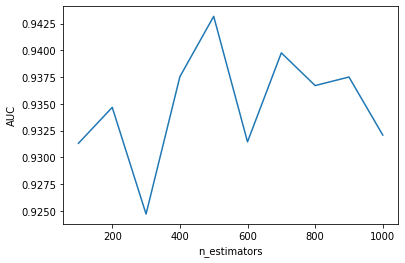

In [ ]:
plt.plot([100,200,300,400,500,600,700,800,900,1000],(list) (auc.values()))
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

In [ ]:
for i in [100,200,300,400,500,600,700,800,900,1000]:
  model = RandomForestClassifier(n_estimators=500 ,max_features = i, random_state=1111,
                                   criterion='entropy', )
  model = AdaBoostClassifier(base_estimator=model)
  model.fit(X_train, y_train)
  predictions = model.predict_proba(X_test)[:, 1]
  r = roc_auc_score(y_test,predictions)
  auc[i] = r

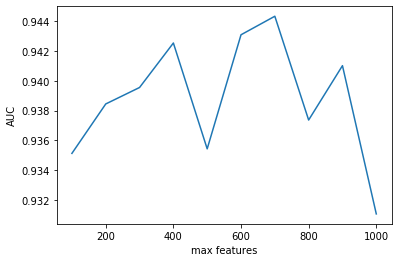

In [ ]:
plt.plot([100,200,300,400,500,600,700,800,900,1000],(list) (auc.values()))
plt.xlabel("max features")
plt.ylabel("AUC")
plt.show()

In [ ]:
auc = {} 
for i in [10,20,30,40,50,60,70,80,90,100]:
  model = RandomForestClassifier(n_estimators=500 ,max_features = 700, max_depth= i, random_state=1111,
                                   criterion='entropy', )
  model = AdaBoostClassifier(base_estimator=model)
  model.fit(X_train, y_train)
  predictions = model.predict_proba(X_test)[:, 1]
  r = roc_auc_score(y_test,predictions)
  auc[i] = r

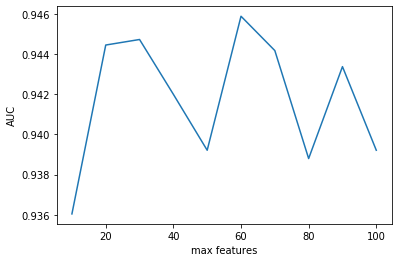

In [ ]:
plt.plot([10,20,30,40,50,60,70,80,90,100],(list) (auc.values()))
plt.xlabel("max depth")
plt.ylabel("AUC")
plt.show()

In [ ]:
auc = {} 
for i in [10,20,30,40,50,60,70,80,90,100,110,120,150,200,250,300]:
  model = RandomForestClassifier(n_estimators=500 ,max_features = 700, max_depth= 60, random_state=1111,
                                   criterion='entropy', )
  model = AdaBoostClassifier(base_estimator=model,n_estimators= i)
  model.fit(X_train, y_train)
  predictions = model.predict_proba(X_test)[:, 1]
  r = roc_auc_score(y_test,predictions)
  auc[i] = r

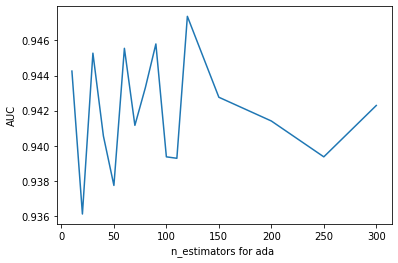

In [ ]:
plt.plot([10,20,30,40,50,60,70,80,90,100,110,120,150,200,250,300],(list) (auc.values()))
plt.xlabel("n_estimators for ada ")
plt.ylabel("AUC")
plt.show()

In [ ]:
auc

{10: 0.9442547097058499,
 20: 0.9361297785611987,
 30: 0.9452737688663656,
 40: 0.9405640630164152,
 50: 0.9377547647901289,
 60: 0.9455491902610995,
 70: 0.9411699900848298,
 80: 0.9433182769637546,
 90: 0.9457970695163601,
 100: 0.9393797510190592,
 110: 0.939297124600639,
 120: 0.9473669714663435,
 150: 0.9427674341742868,
 200: 0.9414178693400904,
 250: 0.9393797510190591,
 300: 0.942299217803239}

In [ ]:

overall_test = data_test.merge(bids2)
temp = pd.DataFrame(columns=["bidder_id","prediction"])
temp["bidder_id"] = overall_test["bidder_id"]
overall_test = overall_test.drop(["bidder_id","payment_account","address"] ,axis = 1)
model = RandomForestClassifier(n_estimators=500, max_features=700,
                                   max_depth=60, random_state=1111,
                                   criterion='entropy', )
model = AdaBoostClassifier(base_estimator=model, n_estimators=120)
model.fit(X_train, y_train)
predictions = model.predict_proba(overall_test)[:, 1]
temp["prediction"] = predictions
result = pd.DataFrame(columns=["bidder_id","prediction"])
result["bidder_id"] = data_test["bidder_id"]
result = result.merge(temp,on="bidder_id",how="left").drop("prediction_x",axis=1)
result["prediction_y"].fillna(1,inplace=True)
result = result.rename(columns={"prediction_y": "prediction"})
result.to_csv("result.csv",index=False)
from google.colab import files
files.download("result.csv")

In [ ]:
importances = model.feature_importances_
names = X_train.columns
label_dict = dict(zip(names,importances))
srt_dict = sorted(label_dict.items(),key = lambda x: x[1],reverse = True)
print(srt_dict)


[('bids_count_num', 0.09753602095747561), ('timediff_nunique_num', 0.050685080257062066), ('mintime', 0.04024864903824844), ('ip_nunique_num', 0.03258917084740005), ('maxtime', 0.029758054619466644), ('auction_nunique_num', 0.02494524395492722), ('mindiff_num', 0.024390298903858916), ('maxdiff_num', 0.024074503744365306), ('url_nunique_num', 0.023186422736761133), ('device_nunique_num', 0.021029523024744493), ('country_nunique_num', 0.010904993060406903), ('au', 0.01075196532420315), ('phone15', 0.008487431041880822), ('sg', 0.008288261388462786), ('no', 0.008172990505777241), ('phone55', 0.007666325300592565), ('phone57', 0.007570349701531529), ('phone110', 0.0074500363463946475), ('phone4', 0.007301776206965129), ('bf', 0.0064357717667317335), ('phone2287', 0.006406712097115663), ('phone239', 0.005932514142963711), ('phone143', 0.005232995409090695), ('phone1120', 0.004746423412099981), ('phone739', 0.004649147987526813), ('ch', 0.004479200984277447), ('lt', 0.004456131187614207), ('

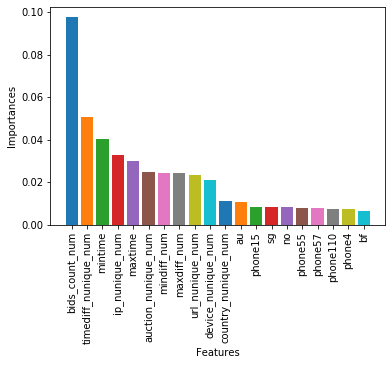

In [ ]:
for i in range(20):
    plt.bar(srt_dict[i][0],srt_dict[i][1])
plt.xlabel("Features")
plt.ylabel("Importances")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
random_state = [100,200,300,400,500,600,700,800,900,1000,1100]
#max_depth = [3,4,5,6,7,8,9,10,11,12,13,14,15,16]
auc = {}
for i in random_state:
  model = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state = 1000)
  model.fit(X_train, y_train)
  predictions = model.predict_proba(X_test)[:, 1]
  auc[i] = roc_auc_score(y_test, predictions)

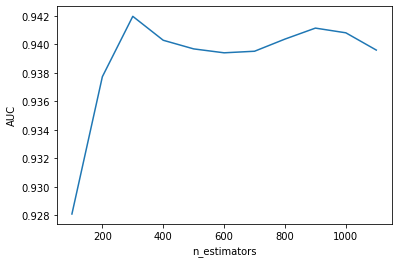

In [ ]:
plt.plot(random_state,(list) (auc.values()))
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

In [ ]:
auc

{100: 0.9280874738349676,
 200: 0.9377272226506554,
 300: 0.9419687121295582,
 400: 0.9402886416216811,
 500: 0.9396827145532665,
 600: 0.9394072931585327,
 700: 0.939517461716426,
 800: 0.9403712680401013,
 900: 0.9411424479453563,
 1000: 0.9408119422716756,
 1100: 0.9396000881348464}

In [ ]:
max_depth = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25]
auc = {}
for i in max_depth:
  model = RandomForestClassifier(n_estimators=300,max_depth= i,criterion='entropy',random_state = 1000)
  model.fit(X_train, y_train)
  predictions = model.predict_proba(X_test)[:, 1]
  auc[i] = roc_auc_score(y_test, predictions)

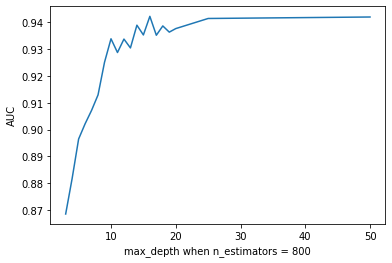

In [ ]:
plt.plot([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,50,100],(list) (auc.values()))
plt.xlabel("max_depth when n_estimators = 800")
plt.ylabel("AUC")
plt.show()


In [ ]:
auc

{3: 0.8685138261540156,
 4: 0.8817891373801917,
 5: 0.8964966398589843,
 6: 0.9021703205905034,
 7: 0.9071829899746613,
 8: 0.9129668392640741,
 9: 0.9251404649113143,
 10: 0.9338988652638538,
 11: 0.9287760273218023,
 12: 0.9337886967059601,
 13: 0.9304836399691528,
 14: 0.9389666189269582,
 15: 0.9353310565164702,
 16: 0.9422716756637656,
 17: 0.9352208879585766,
 18: 0.9386911975322244,
 19: 0.9363776578164591,
 20: 0.9376996805111821,
 25: 0.9414729536190372,
 50: 0.942023796408505}

In [ ]:
overall_test = data_test.merge(bids2)
temp = pd.DataFrame(columns=["bidder_id","prediction"])
temp["bidder_id"] = overall_test["bidder_id"]
overall_test = overall_test.drop(["bidder_id","payment_account","address"] ,axis = 1)
clf = RandomForestClassifier(n_estimators = 300, max_depth = 16, random_state = 1000, criterion="entropy")
clf.fit(X_train, y_train)
predictions = clf.predict_proba(overall_test)[:, 1]
temp["prediction"] = predictions
result = pd.DataFrame(columns=["bidder_id","prediction"])
result["bidder_id"] = data_test["bidder_id"]
result = result.merge(temp,on="bidder_id",how="left").drop("prediction_x",axis=1)
result["prediction_y"].fillna(1,inplace=True)
result = result.rename(columns={"prediction_y": "prediction"})
result.to_csv("result.csv",index=False)
from google.colab import files
files.download("result.csv")

In [ ]:
importances = model.feature_importances_
names = X_train.columns
label_dict = dict(zip(names,importances))
srt_dict = sorted(label_dict.items(),key = lambda x: x[1],reverse = True)
print(srt_dict)


[('bids_count_num', 0.04274338571955192), ('timediff_nunique_num', 0.026869536039301076), ('mintime', 0.022471728763515234), ('ip_nunique_num', 0.021398369931445428), ('maxdiff_num', 0.018496689816847284), ('mindiff_num', 0.016404108200391954), ('auction_nunique_num', 0.0162984270586656), ('url_nunique_num', 0.016041983200747782), ('maxtime', 0.016036832914096445), ('device_nunique_num', 0.01289052820088591), ('country_nunique_num', 0.009999270207039238), ('au', 0.008701582883548465), ('phone143', 0.008032744598647782), ('sg', 0.007211271662797207), ('phone2287', 0.005058297579285022), ('no', 0.0047258443910455725), ('in', 0.004547708195085362), ('phone46', 0.004412219632672937), ('ch', 0.004322757290051341), ('phone2330', 0.004253562667219895), ('phone728', 0.00407581479613365), ('de', 0.00380504901494843), ('fr', 0.003397449836032268), ('th', 0.0033307749682299644), ('phone110', 0.0032028796098992774), ('phone55', 0.0030996173301298937), ('phone739', 0.0030988442863636705), ('phone60

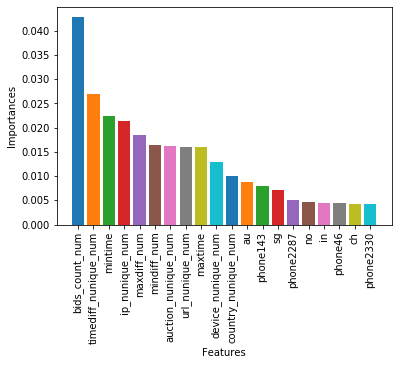

In [ ]:
for i in range(20):
    plt.bar(srt_dict[i][0],srt_dict[i][1])
plt.xlabel("Features")
plt.ylabel("Importances")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
auc = {}
b= BaggingClassifier(n_estimators=700)
b.fit(X_train, y_train)
preds = b.predict(X_test)
r = roc_auc_score(y_test,preds)
print(r)

0.6063340410474168


In [ ]:
results = {}
best = {}
min_samples_split = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
min_samples_leaf = [0.1,0.2,0.3,0.4,0.5]
for i in min_samples_split:
  for j in min_samples_leaf:
    clf = DecisionTreeClassifier(min_samples_split= i, min_samples_leaf= j,criterion="gini")
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_test)[:, 1]
    r = roc_auc_score(y_test, predictions)
    best[(i,j)] = r
    if i not in results:
      results[i] = [r]
    else:
      results[i].append(r) 


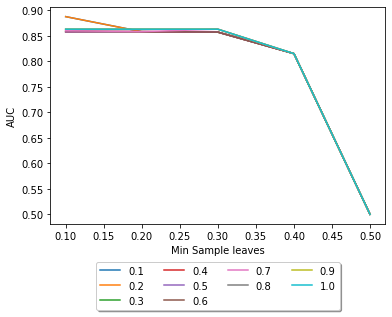

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
for i in results:
  plt.plot(min_samples_leaf,results[i],label = i)
  ax.set_xlabel("Min Sample leaves")
  ax.set_ylabel("AUC")
  plt.legend(loc="lower right")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})
plt.show()

In [ ]:
bestcon = sorted(best.items(),key =lambda x : x[1], reverse = True )
print("configurations: min_samples_split = {}, min_samples_leafs = {}".format(bestcon[0][0][0],bestcon[0][0][1]))
print("accuracy = ",bestcon[0][1])

configurations: min_samples_split = 0.1, min_samples_leafs = 0.1
accuracy =  0.887600528809078


[('bids_count_num', 0.6751141986195323), ('phone36', 0.21642810177745866), ('url_nunique_num', 0.0636749644189384), ('mintime', 0.04478273518407048), ('auction_nunique_num', 0.0), ('merchandise_nunique_num', 0.0), ('device_nunique_num', 0.0), ('timediff_nunique_num', 0.0), ('country_nunique_num', 0.0), ('ip_nunique_num', 0.0), ('maxtime', 0.0), ('maxdiff_num', 0.0), ('mindiff_num', 0.0), ('phone561', 0.0), ('phone640', 0.0), ('phone219', 0.0), ('phone313', 0.0), ('phone420', 0.0), ('phone102', 0.0), ('phone257', 0.0), ('phone4', 0.0), ('phone45', 0.0), ('phone788', 0.0), ('phone76', 0.0), ('phone35', 0.0), ('phone167', 0.0), ('phone65', 0.0), ('phone37', 0.0), ('phone786', 0.0), ('phone262', 0.0), ('phone1955', 0.0), ('phone2210', 0.0), ('phone31', 0.0), ('phone134', 0.0), ('phone77', 0.0), ('phone286', 0.0), ('phone5481', 0.0), ('phone5', 0.0), ('phone101', 0.0), ('phone179', 0.0), ('phone33', 0.0), ('phone24', 0.0), ('phone165', 0.0), ('phone152', 0.0), ('phone82', 0.0), ('phone142',

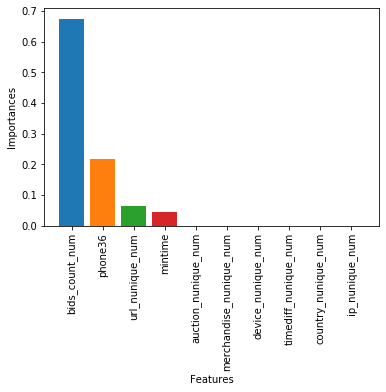

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split= 0.1, min_samples_leaf= 0.1,criterion="entropy")
dtc.fit(X_train,y_train)
importances = dtc.feature_importances_
names = X_train.columns
label_dict = dict(zip(names,importances))
srt_dict = sorted(label_dict.items(),key = lambda x: x[1],reverse = True)
print(srt_dict)
for i in range(10):
    plt.bar(srt_dict[i][0],srt_dict[i][1])
plt.xlabel("Features")
plt.ylabel("Importances")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
overall_test = data_test.merge(bids2)
temp = pd.DataFrame(columns=["bidder_id","prediction"])
temp["bidder_id"] = overall_test["bidder_id"]
overall_test = overall_test.drop(["bidder_id","payment_account","address"] ,axis = 1)
clf = DecisionTreeClassifier(min_samples_leaf=0.1,min_samples_split=0.1,criterion="entropy")
clf.fit(X_train, y_train)
predictions = clf.predict_proba(overall_test)[:, 1]
temp["prediction"] = predictions
result = pd.DataFrame(columns=["bidder_id","prediction"])
result["bidder_id"] = data_test["bidder_id"]
result = result.merge(temp,on="bidder_id",how="left").drop("prediction_x",axis=1)
result["prediction_y"].fillna(1,inplace=True)
result = result.rename(columns={"prediction_y": "prediction"})
result.to_csv("result.csv",index=False)
from google.colab import files
files.download("result.csv")

## GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
xtr,xts,ytr,yts = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, KFold


In [ ]:
model_best = XGBClassifier(nthread=-1,
                           subsample = 0.8,
                           gamma = 0.2,
                           learning_rate = 0.1, 
                           n_estimators = 150,
                           max_depth = 8,
                           reg_alpha = 0.01,
                           reg_lambda = 0.01,
                           min_child_weight = 4,
                           colsample_bytree = 0.7,
                           scale_pos_weight=1,
                           seed=233,
                           tree_method = 'hist')

In [ ]:
model_best.fit(X_train, np.array(y_train).ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=None, n_estimators=150, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=233,
              silent=None, subsample=0.8, tree_method='hist', verbosity=1)

In [ ]:
overall_test

,bids_count_num,auction_nunique_num,merchandise_nunique_num,device_nunique_num,timediff_nunique_num,country_nunique_num,ip_nunique_num,url_nunique_num,maxtime,mintime,maxdiff_num,mindiff_num,ip = 243,ip = 190,ip = 6,ip = 130,ip = 132,ip = 43,ip = 91,ip = 44,ip = 193,ip = 161,ip = 169,ip = 7,ip = 98,ip = 209,ip = 51,ip = 207,ip = 123,ip = 183,ip = 219,ip = 136,ip = 58,ip = 124,ip = 8,ip = 176,ip = 172,ip = 117,ip = 48,ip = 116,...,gu,cg,gl,nz,mv,ps,tm,ag,ad,sr,ws,je,do,li,fj,nc,gi,cf,mo,dm,bt,re,fo,mp,bm,gn,tl,pg,pf,vc,zz,bs,aw,gb,vi,mh,tc,an,er,gp
0,4,3,1,2,4,3,4,3,9703350263157894,9633126578947368,5.989721e+13,5.989721e+13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2,1,3,3,2,2,1,9708414684210526,9632412631578947,7.600195e+13,7.600195e+13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,17,14,1,4,16,3,4,2,9705394578947368,9705103526315789,2.485789e+11,2.485789e+11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,148,90,1,81,146,14,129,80,9708478000000000,9631956368421052,5.015947e+13,5.015947e+13,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,20,1,17,22,2,17,1,9642466105263157,9635891315789473,3.373105e+12,3.373105e+12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,983,41,1,9,187,5,22,4,9703549842105263,9636260631578947,5.114521e+13,5.114521e+13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4626,66,32,1,29,66,10,49,18,9772885105263157,9759497842105263,1.570158e+12,1.570158e+12,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4627,2162,419,1,376,890,86,1460,1049,9709200947368421,9631917315789473,5.006800e+13,5.006800e+13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4628,5,5,1,4,5,1,5,2,9642512473684210,9633372157894736,5.641158e+12,5.641158e+12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
overall_test

,bids_count_num,auction_nunique_num,merchandise_nunique_num,device_nunique_num,timediff_nunique_num,country_nunique_num,ip_nunique_num,url_nunique_num,maxtime,mintime,maxdiff_num,mindiff_num,ip = 243,ip = 190,ip = 6,ip = 130,ip = 132,ip = 43,ip = 91,ip = 44,ip = 193,ip = 161,ip = 169,ip = 7,ip = 98,ip = 209,ip = 51,ip = 207,ip = 123,ip = 183,ip = 219,ip = 136,ip = 58,ip = 124,ip = 8,ip = 176,ip = 172,ip = 117,ip = 48,ip = 116,...,gu,cg,gl,nz,mv,ps,tm,ag,ad,sr,ws,je,do,li,fj,nc,gi,cf,mo,dm,bt,re,fo,mp,bm,gn,tl,pg,pf,vc,zz,bs,aw,gb,vi,mh,tc,an,er,gp
0,4,3,1,2,4,3,4,3,9703350263157894,9633126578947368,5.989721e+13,5.989721e+13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2,1,3,3,2,2,1,9708414684210526,9632412631578947,7.600195e+13,7.600195e+13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,17,14,1,4,16,3,4,2,9705394578947368,9705103526315789,2.485789e+11,2.485789e+11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,148,90,1,81,146,14,129,80,9708478000000000,9631956368421052,5.015947e+13,5.015947e+13,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,20,1,17,22,2,17,1,9642466105263157,9635891315789473,3.373105e+12,3.373105e+12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,983,41,1,9,187,5,22,4,9703549842105263,9636260631578947,5.114521e+13,5.114521e+13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4626,66,32,1,29,66,10,49,18,9772885105263157,9759497842105263,1.570158e+12,1.570158e+12,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4627,2162,419,1,376,890,86,1460,1049,9709200947368421,9631917315789473,5.006800e+13,5.006800e+13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4628,5,5,1,4,5,1,5,2,9642512473684210,9633372157894736,5.641158e+12,5.641158e+12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
overall_test = data_test.merge(bids2)
temp = pd.DataFrame(columns=["bidder_id","prediction"])
temp["bidder_id"] = overall_test["bidder_id"]
overall_test = overall_test.drop(["bidder_id","payment_account","address"] ,axis = 1)
predictions = model_best.predict_proba(overall_test)[:,1]
temp["prediction"] = predictions
result = pd.DataFrame(columns=["bidder_id","prediction"])
result["bidder_id"] = data_test["bidder_id"]
result = result.merge(temp,on="bidder_id",how="left").drop("prediction_x",axis=1)
result["prediction_y"].fillna(1,inplace=True)
result = result.rename(columns={"prediction_y": "prediction"})
result.to_csv("result.csv",index=False)
from google.colab import files
files.download("result.csv")